# Expressibility and entangling capability of parameterized quantum circuits for hybrid quantum-classical algorithms

In this document, we are replicating the work by S.Sim,P.D.Johnson and A.Aspuru-Guzik *Adv.Quantum.Technol.* **2** 1900070 (2019).

In [40]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector

provider = IBMQ.load_account()


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt

ibmqfactory.load_account:WARNING:2021-03-07 18:08:31,220: Credentials are already in use. The existing account in the session will be replaced.


Idle Circuit

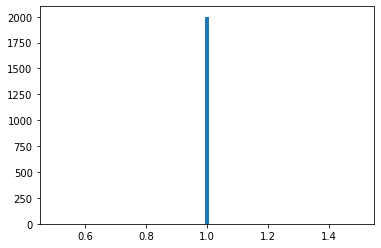

In [110]:
backend = Aer.get_backend('qasm_simulator')
nshot=2000
fedelity=[]    
for x in range(nshot):
    th=2*pi*random()
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.i(qr[0])
    qc.i(qr[0])
    qc.measure(qr[0],cr[0])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()

    if '0' in count:
        ratio=count['0']/nshot
    else:
        ratio=0
    fedelity.append(ratio)
plt.hist(fedelity, bins=75)
plt.show()

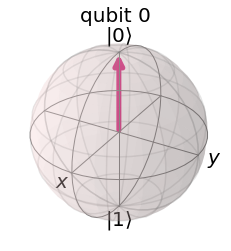

In [44]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)


$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

$$
R_\phi = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

$$\tfrac{1}{\sqrt{2}}* \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix} * \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} |0\rangle  $$

$$\tfrac{1}{\sqrt{2}}* \begin{bmatrix} 1 & 1 \\ e^{i\phi}  & -e^{i\phi} \end{bmatrix} |0\rangle  $$

$$\tfrac{1}{\sqrt{2}}* \begin{bmatrix} 1 & 1 \\ e^{i\phi}  & -e^{i\phi} \end{bmatrix} |0\rangle  $$

$$\tfrac{1}{\sqrt{2}}* (|0\rangle +e^{i\phi}|1\rangle) $$





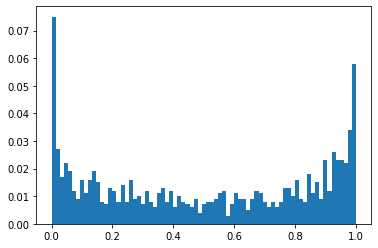

In [233]:
from random import seed
from random import random
import cmath
j=(-1)**(1/2)

backend = Aer.get_backend('qasm_simulator')
nshot=1000
fedelity=[]    
for x in range(nshot):
    th=2*pi*random()
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr[0])
    qc.rz(th, qr[0])
    qc.measure(qr[0],cr[0])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()

    if '0' in count and '1' in count:
        ratio=abs(1/math.sqrt(2)*math.sqrt(count['0']/nshot) +1/math.sqrt(2)*cmath.exp(j*th)*math.sqrt(count['1']/nshot))**2
    elif '0' in count and '1' not in count:
        ratio=abs(1/math.sqrt(2)*math.sqrt(count['0']/nshot))**2
    else:
        ratio=abs(1/math.sqrt(2)*cmath.exp(j*th)*math.sqrt(count['1']/nshot))**2

    
    fedelity.append(ratio)
    
weights = np.ones_like(fedelity)/float(len(fedelity))
plt.hist(fedelity, bins=75, weights=weights)
plt.show()

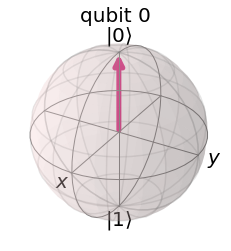

In [206]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

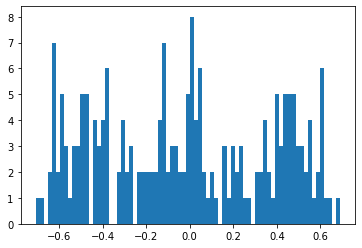

In [230]:
backend = Aer.get_backend('qasm_simulator')
nshot=200
fedelity=[]    
for x in range(nshot):
    th1=2*pi*random()
    th2=2*pi*random()
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr[0])
    qc.rz(th1, qr[0])
    qc.rx(th2, qr[0])

    qc.measure(qr[0],cr[0])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()

    if '0' in count:
        ratio=math.cos(th1)*count['0']/nshot
    else:
        ratio=0
    fedelity.append(ratio)
plt.hist(fedelity, bins=75)
plt.show()

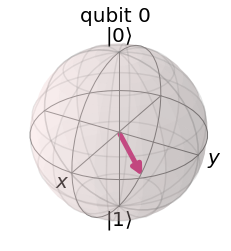

In [156]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)
th1=pi/4
th2=0*pi/6
qc.h(qr[0])
qc.rz(th1, qr[0])
qc.rx(th2, qr[0])
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [47]:
qc = QuantumCircuit(1)
qc.u3(pi/2,pi/2,pi/2,0)
qc.draw()

<ipython-input-47-ebed3155adb5>:2: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(pi/2,pi/2,pi/2,0)


┌─────────────────┐
q_0: ┤ U3(π/2,π/2,π/2) ├
     └─────────────────┘

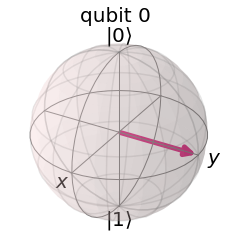

In [48]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)